<a href="https://colab.research.google.com/github/PQHSGS/ML-DL/blob/main/DL_CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 5.5 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# 1. Thêm các thư viện cần thiết
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
import visualkeras
(full_train_img, full_train_label), (test_img, test_label) = mnist.load_data()

In [ ]:
full_train_label.shape

(60000,)

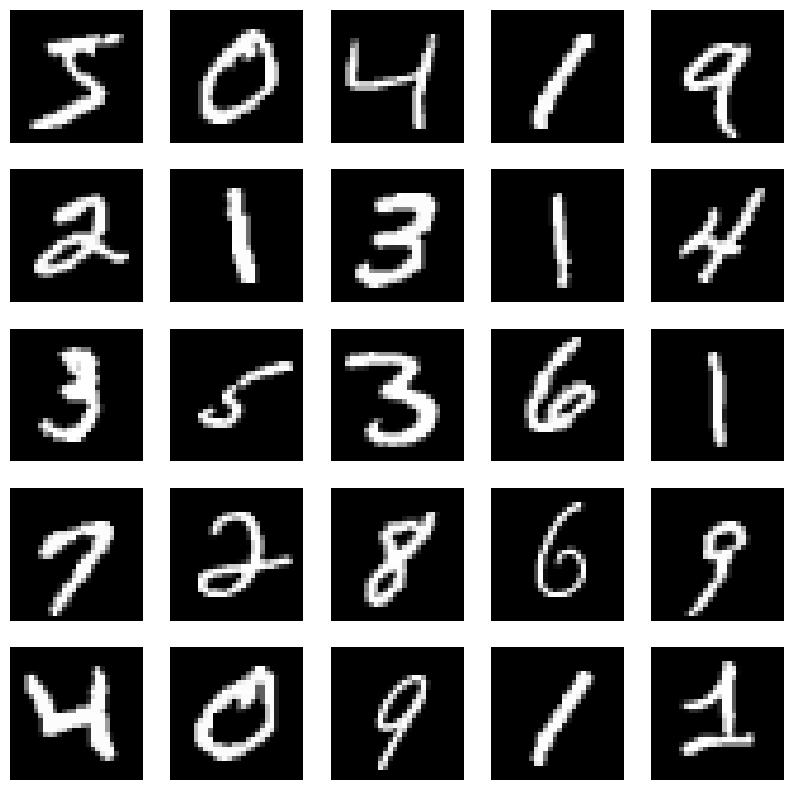

In [ ]:
rows=5
cols=5
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.imshow(full_train_img[i],cmap="gray")
    plt.axis("off")

In [ ]:
#initial numbers, data
num_class=10
train_img, train_label=[],[]
val_img, val_label=[],[]
#create classes for disstributing
class_img={i:[] for i in range(num_class)}
class_label={i:[] for i in range(num_class)}
#categorize data into seperate classes
for img, label in zip(full_train_img,full_train_label):
    class_img[label].append(img)
    class_label[label].append(label)
#split data to train and val lists
for i in range(num_class):
    img=class_img[i]
    label=class_label[i]
    train, val,t_lbl,v_lbl=train_test_split(img,label,test_size=1000)

    train_img.extend(train)
    val_img.extend(val)

    train_label.extend(t_lbl)
    val_label.extend(v_lbl)

train_img=np.array(train_img)
train_label=np.array(train_label)
val_img=np.array(val_img)
val_label=np.array(val_label)

In [ ]:
train_img = train_img.reshape(train_img.shape[0], 28, 28, 1)
val_img = val_img.reshape(val_img.shape[0], 28, 28, 1)
test_img = test_img.reshape(test_img.shape[0], 28, 28, 1)
# 4. One hot encoding label (Y)
Train_label = to_categorical(train_label, 10)
Val_label = to_categorical(val_label, 10)
Test_label = to_categorical(test_label, 10)

In [ ]:
Train_img=train_img/255
Val_img=val_img/255
Test_img=test_img/255

In [ ]:
# 5. Định nghĩa model
model = Sequential()
Cnv_activation='relu'
FC_activation='relu'
padding='same'

model.add(Conv2D(32, (3, 3), padding=padding,activation=Cnv_activation, input_shape=(28,28,1)))
model.add(Conv2D(32, (3, 3), padding=padding,activation=Cnv_activation))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3), padding=padding,activation=Cnv_activation))
model.add(Conv2D(64, (3, 3), padding=padding,activation=Cnv_activation))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3, 3), padding=padding, activation=Cnv_activation))
model.add(Conv2D(128, (3, 3), padding=padding,activation=Cnv_activation))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(rate=0.4))
model.add(BatchNormalization())
model.add(Dense(128, activation='sigmoid'))

model.add(Dropout(rate=0.2))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])


Epoch 1/20
 19/782 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.3073 - loss: 2.2517

W0000 00:00:1722350505.211494     146 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8806 - loss: 0.3766

W0000 00:00:1722350513.246510     148 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1722350513.991587     147 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.8807 - loss: 0.3763 - val_accuracy: 0.9831 - val_loss: 0.0544
Epoch 2/20
 25/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9812 - loss: 0.0633

W0000 00:00:1722350514.773215     145 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9828 - loss: 0.0549 - val_accuracy: 0.9866 - val_loss: 0.0495
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9868 - loss: 0.0443 - val_accuracy: 0.9897 - val_loss: 0.0334
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9878 - loss: 0.0383 - val_accuracy: 0.9896 - val_loss: 0.0336
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9912 - loss: 0.0278 - val_accuracy: 0.9909 - val_loss: 0.0313
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9912 - loss: 0.0275 - val_accuracy: 0.9890 - val_loss: 0.0380
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9933 - loss: 0.0208 - val_accuracy: 0.9896 - val_loss: 0.0343
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9937 - loss: 0.0206 - val_accuracy: 0.9900 - val_loss: 0.0372
Epoch 9/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9941 - loss: 0.0195 - val_accuracy: 0.9918 - val_

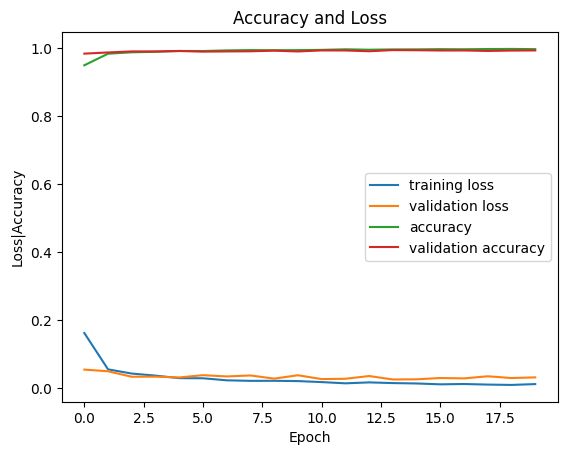

In [ ]:
numOfEpoch = 20
H = model.fit(Train_img, Train_label, validation_data=(Val_img, Val_label),
batch_size=64, epochs=numOfEpoch, verbose=1)

fig = plt.figure()
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()



In [ ]:
# 9. Đánh giá model với dữ liệu test set
score,accuracy = model.evaluate(Test_img,Test_label, verbose=1)
print(accuracy)

 63/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9940 - loss: 0.0191

W0000 00:00:1722350606.018812     146 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9926 - loss: 0.0267
0.9943000078201294


In [ ]:
predicts=model.predict(Test_img)
predict_label=[]
for i in range (predicts.shape[0]):
    predict_label.append(np.argmax(predicts[i]))
predict_label=np.array(predict_label)

 98/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

W0000 00:00:1722350609.809588     148 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


W0000 00:00:1722350610.670261     145 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [ ]:
error=[i for i in range (predict_label.shape[0]) if test_label[i] != predict_label[i]]
error_img=test_img[error]
error_label=predict_label[error]
error_img.shape

(57, 28, 28, 1)

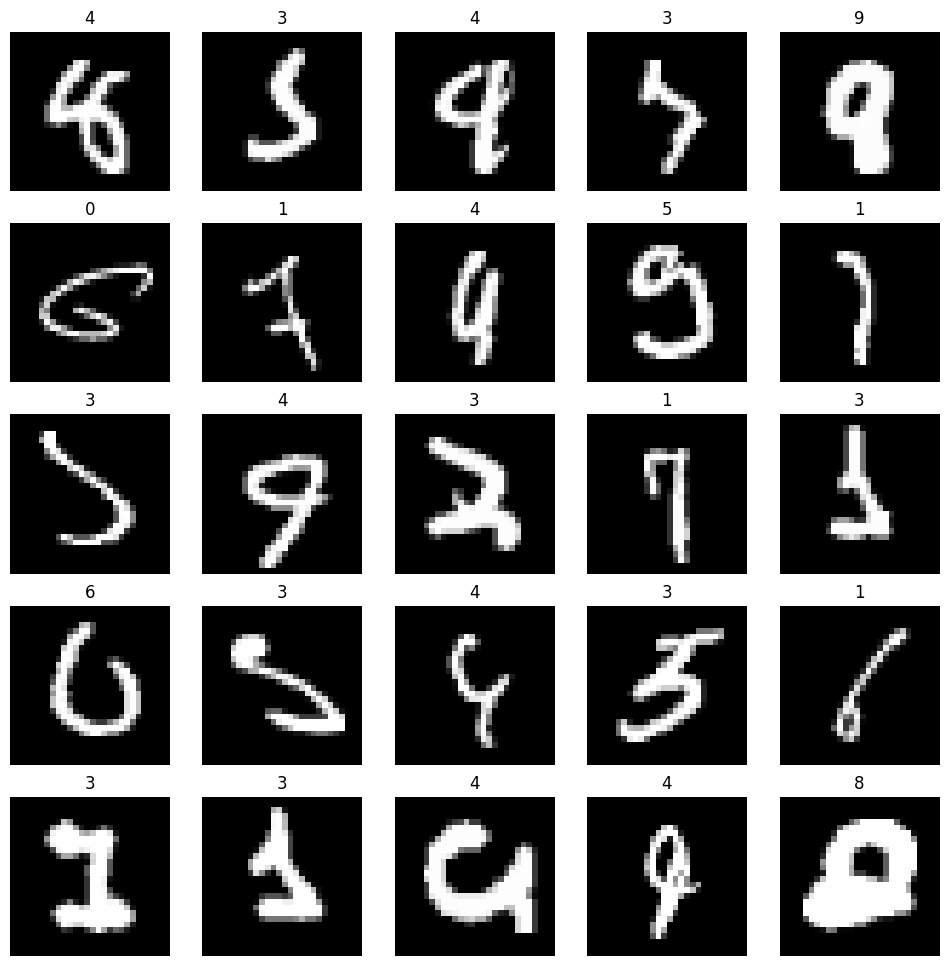

In [ ]:
rows=5
cols=5
plt.figure(figsize=(12,12))
for i in range (rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.imshow(error_img[i], cmap='gray')
    plt.axis("off")
    plt.title(error_label[i])